In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
batch_size = 64
num_classes = 10
lr = 0.001
epochs = 20

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cuda')

In [5]:
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std=[0.2023, 0.1994, 0.2010])])

In [6]:
train_data = torchvision.datasets.CIFAR10(root = './data',train = True,transform = all_transforms,download = True)

100%|██████████| 170498071/170498071 [00:13<00:00, 12956644.44it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [7]:
test_data = torchvision.datasets.CIFAR10(root = './data',train = False,transform = all_transforms,download = True)

Files already downloaded and verified


In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,batch_size = batch_size,shuffle = True)

In [9]:
test_loader = torch.utils.data.DataLoader(dataset = test_data,batch_size = batch_size,shuffle = True)

In [10]:
len(train_data)

50000

In [11]:
class ConvNN(nn.Module):
  def __init__(self,num_classes):
    super(ConvNN,self).__init__()
    self.conv_layer1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3)
    self.conv_layer2 = nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3)
    self.max_pool1 = nn.MaxPool2d(kernel_size=2,stride=2)

    self.conv_layer3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3)
    self.conv_layer4 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2,stride=2)

    self.fc1 = nn.Linear(1600,128)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(128,num_classes)

  def forward(self,x):
    out = self.conv_layer1(x)
    out = self.conv_layer2(out)
    out = self.max_pool1(out)

    out = self.conv_layer3(out)
    out = self.conv_layer4(out)
    out = self.max_pool2(out)

    out = out.reshape(out.size(0),-1)

    out = self.fc1(out)
    out = self.relu1(out)
    out = self.fc2(out)
    return out

In [12]:
model = ConvNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr,weight_decay=0.005,momentum=0.9)
total_step = len(train_loader)

In [13]:
if torch.cuda.is_available():
    model.cuda()

In [14]:
for epoch in range(epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print('Epoch [{}/{}], Loss: {:.4}'.format(epoch+1, epochs, loss.item()))

Epoch [1/20], Loss: 1.986
Epoch [2/20], Loss: 1.812
Epoch [3/20], Loss: 1.579
Epoch [4/20], Loss: 0.9023
Epoch [5/20], Loss: 0.9505
Epoch [6/20], Loss: 1.108
Epoch [7/20], Loss: 1.241
Epoch [8/20], Loss: 1.427
Epoch [9/20], Loss: 0.4145
Epoch [10/20], Loss: 0.7339
Epoch [11/20], Loss: 0.8888
Epoch [12/20], Loss: 0.608
Epoch [13/20], Loss: 0.8358
Epoch [14/20], Loss: 0.4987
Epoch [15/20], Loss: 0.5085
Epoch [16/20], Loss: 0.4574
Epoch [17/20], Loss: 0.9083
Epoch [18/20], Loss: 0.6768
Epoch [19/20], Loss: 0.8456
Epoch [20/20], Loss: 0.5667


In [15]:
with torch.no_grad():
  correct = 0
  total = 0
  for images,labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Accuracy of the CNN on the {} train images: {} %'.format(50000,100*correct/total))

Accuracy of the CNN on the 50000 train images: 82.594 %


In [16]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

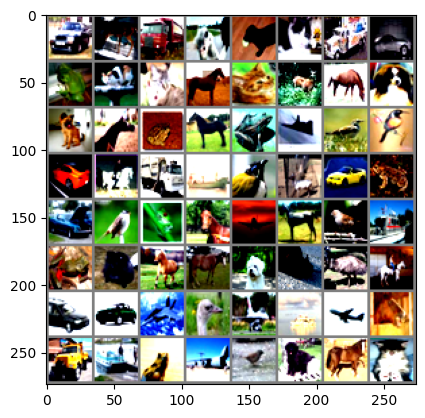

GroundTruth for the first row of the above image grid:
 car   deer  truck bird  dog   cat   truck car   frog  cat  


In [22]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth for the first row of the above image grid:\n', ' '.join(f'{classes[labels[j]]:5s}' for j in range(10)))